# <span style="color:blue">Esercitazione 5</span>

### Esercizio 05.1

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def far(if_far):
    if if_far: name='_far_'
    else: name='_'
    return name

def r_fig(if_far):
    dataGS=np.genfromtxt('results/res'+far(if_far)+'0.out',usecols=(0,2,3),names='x,res,err')
    data210=np.genfromtxt('results/res'+far(if_far)+'1.out',usecols=(0,2,3),names='x,res,err')
    gaussGS=np.genfromtxt('results/res_gauss'+far(if_far)+'0.out',usecols=(0,2,3),names='x,res,err')
    gauss210=np.genfromtxt('results/res_gauss'+far(if_far)+'1.out',usecols=(0,2,3),names='x,res,err')
    data=(dataGS,gaussGS,data210,gauss210)
    r_teo=(1.5,5.); title=('Ground State','$n=2$, $l=1$, $m=0$')
    
    pl.figure(figsize=(10,10))
    for i in range(2):
        pl.subplot(2,1,i+1)
        pl.errorbar(data[2*i]['x'],data[2*i]['res'],yerr=data[2*i]['err'],label='Uniform T')
        pl.errorbar(data[2*i+1]['x'],data[2*i+1]['res'],yerr=data[2*i+1]['err'],label='Gaussian T')
        pl.axhline(y=r_teo[i],color='k',linewidth=0.8,label='expected <r>')
        pl.legend(loc='best')
        if i==1: pl.xlabel('$N_{blk}$')
        pl.ylabel('$<r>$',labelpad=15)
        pl.title(title[i])
        pl.grid(True)
    pl.show()

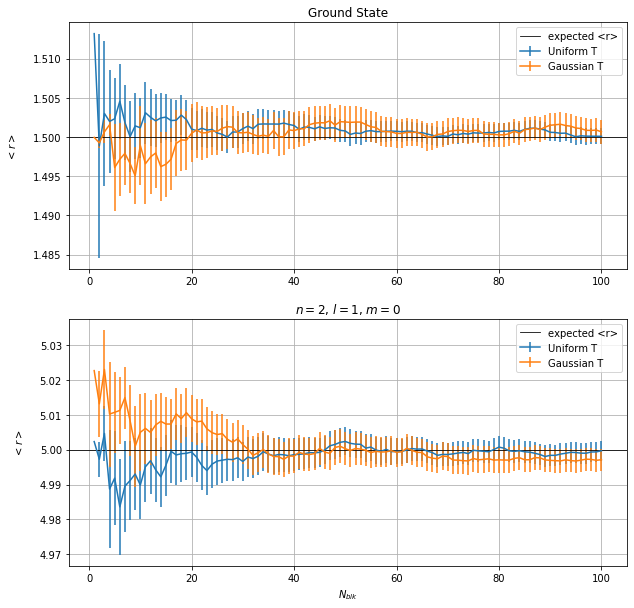

In [3]:
r_fig(False)

In [4]:
def burn_fig(if_far):
    if if_far: farfile='_far_'
    else: farfile='_'
    burnGS=np.genfromtxt('results/burn_in'+far(if_far)+'0_0.out',skip_header=1,names='x,r')
    burn210=np.genfromtxt('results/burn_in'+far(if_far)+'0_1.out',skip_header=1,names='x,r')

    pl.figure(figsize=(15,5))
    pl.plot(burn210['x'],burn210['r'],label='(2,1,0) state')
    pl.plot(burnGS['x'],burnGS['r'],label='GS')
    pl.axhline(y=1.5,color='k',linewidth=0.8,label='expected <r>')
    pl.axhline(y=5,color='k',linewidth=0.8)
    pl.legend(loc='best')
    pl.xlabel('$N_{stp}$')
    pl.ylabel('$r$',labelpad=15)
    pl.title('Uniform T burn in')
    pl.grid(True)
    pl.show()

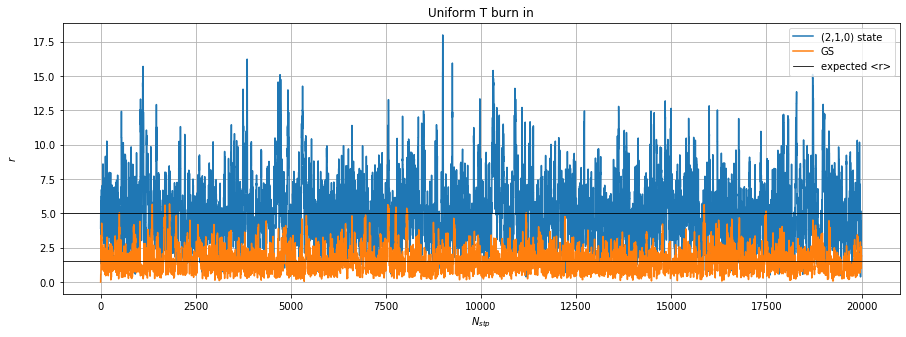

In [5]:
burn_fig(False)

In [6]:
def fig3D(if_far,state):
    if if_far: state+="_far"
    pos=np.genfromtxt('results/'+state+'.config',delimiter=' ',names='x,y,z')

    fig = pl.figure()
    ax = Axes3D(fig)
    ax.scatter(pos['x'], pos['y'], pos['z'], c=pos['z'], marker='.')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(1, 30)
    if (state=="GS") or (state=="GS_far"): pl.title('Ground State')
    elif (state=="210") or (state=="210_far"): pl.title('$n=2$, $l=1$, $m=0$')
    pl.show()

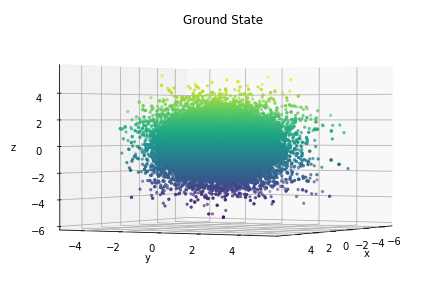

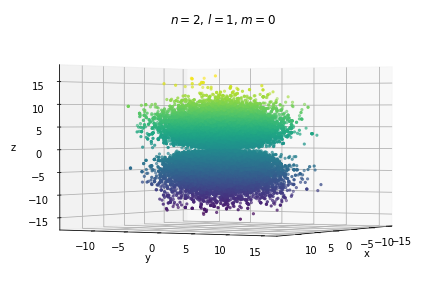

In [7]:
fig3D(False,"GS")
fig3D(False,"210")

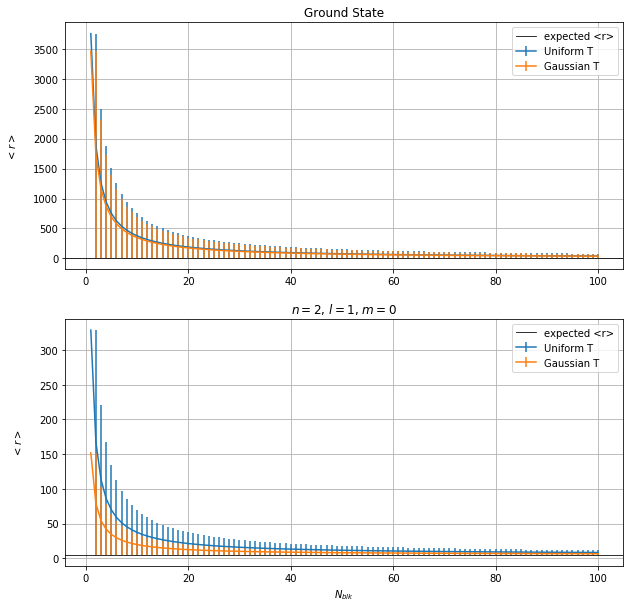

In [8]:
r_fig(True)

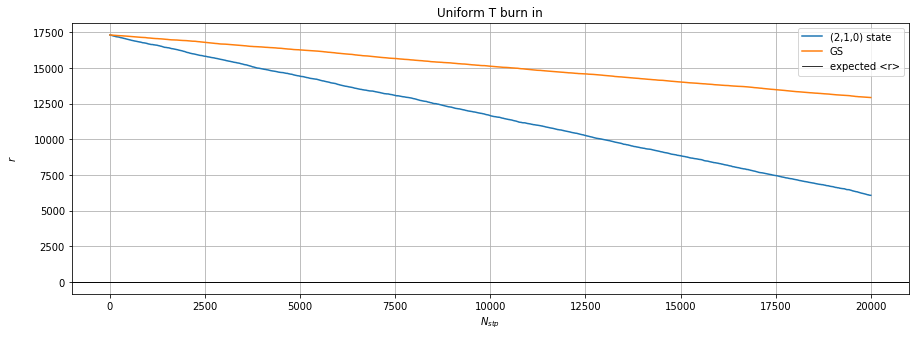

In [9]:
burn_fig(True)

**Attenzione!** *Dirò che da sotto si vede che comunque il walker è arrivato nella zona di interesse, ma dal grafico appena sopra non sembra. Beh, il grafico appena sotto però rappresenta l'**inizio** della simulazione, il burn-in, mentre gli scatter plot sotto sono l'ultimo blocco, quindi la fine della simulazione. Col grafico sopra sto vedendo che quando inizio a fare le misure di $\langle r \rangle$ è in realtà ancora troppo presto e dovrei allungare il burn-in (tant'è che nel grafico ancora sopra, quello della media, inizio sballato).*

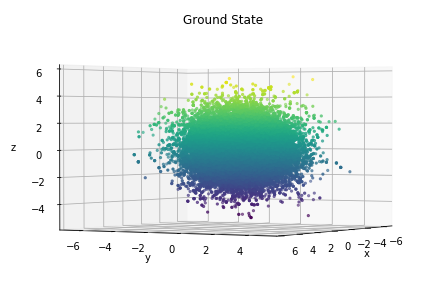

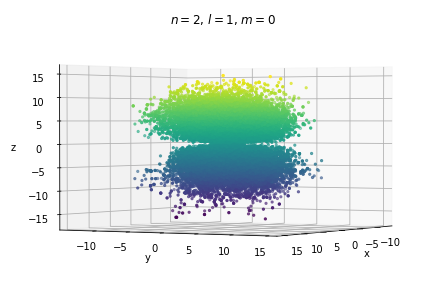

In [10]:
fig3D(True,"GS")
fig3D(True,"210")